# Classifier using a Naive Bayesian Classifier

In [33]:
def split_xy(df):
    return df.drop(["Diabetes_binary"], axis = 1), df["Diabetes_binary"]

In [34]:
import pandas as pd

train_set = pd.read_csv("cdc_diabetes_health_indicators_train1.csv")
train_set_snd = pd.read_csv("cdc_diabetes_health_indicators_train2.csv")
test_set = pd.read_csv("cdc_diabetes_health_indicators_test.csv")

X_train, y_train = split_xy(train_set)
X_test, y_test = split_xy(test_set)

# Evaluation using CategoricalNB

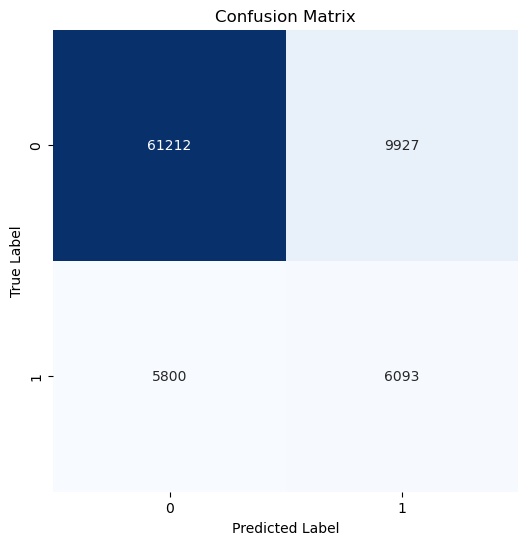

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89     71139
           1       0.38      0.51      0.44     11893

    accuracy                           0.81     83032
   macro avg       0.65      0.69      0.66     83032
weighted avg       0.84      0.81      0.82     83032



In [35]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

CNB_model = CategoricalNB()
CNB_model.fit(X_train, y_train)

y_pred = CNB_model.predict(X_test)

class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n", class_report)

# Evaluation using GaussianNB

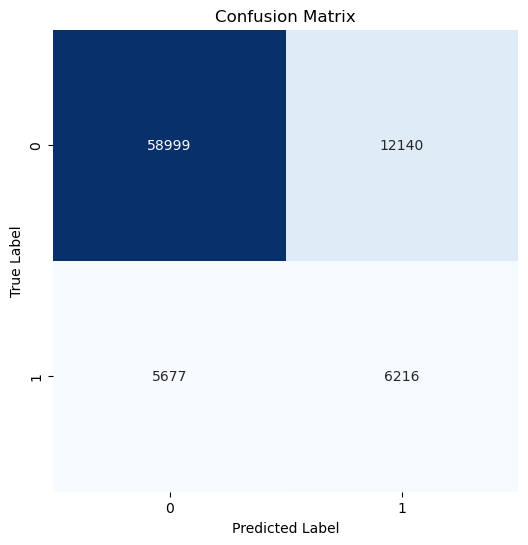

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87     71139
           1       0.34      0.52      0.41     11893

    accuracy                           0.79     83032
   macro avg       0.63      0.68      0.64     83032
weighted avg       0.83      0.79      0.80     83032



In [36]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

y_pred = GNB_model.predict(X_test)

class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n", class_report)

# Rebalancing train dataset

In [37]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

resampler = RandomUnderSampler(random_state=100)

print(Counter(y_train))
X_train_res, y_train_res = resampler.fit_resample(X_train, y_train)
print(Counter(y_train_res))

Counter({0: 68887, 1: 11702})
Counter({0: 11702, 1: 11702})


# Evaluation using CategoricalNB again after rebalancing

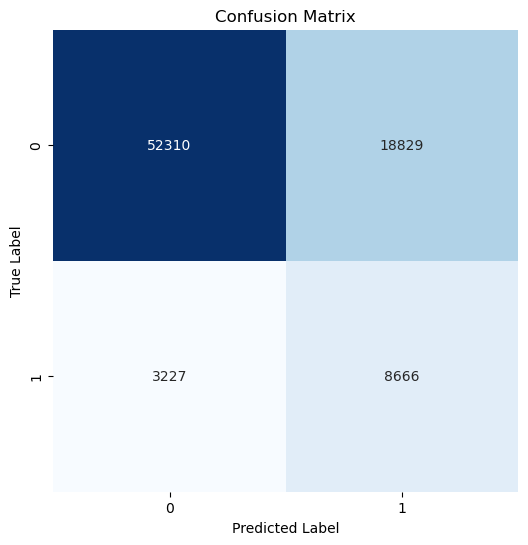

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83     71139
           1       0.32      0.73      0.44     11893

    accuracy                           0.73     83032
   macro avg       0.63      0.73      0.63     83032
weighted avg       0.85      0.73      0.77     83032



In [38]:
CNB_model = CategoricalNB()
CNB_model.fit(X_train_res, y_train_res)

y_pred = CNB_model.predict(X_test)

class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n", class_report)

# Evaluation using GaussianNB again after rebalancing

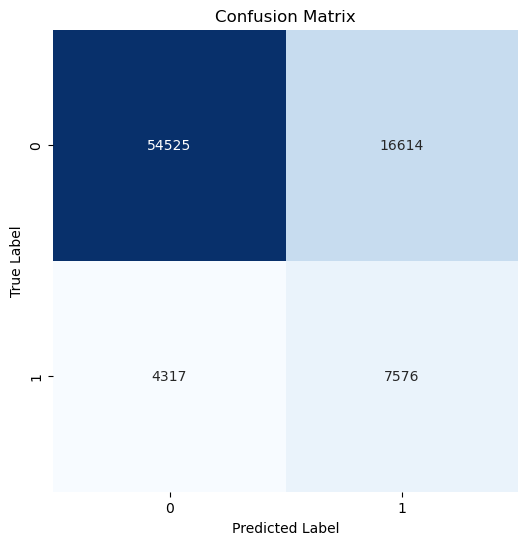

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84     71139
           1       0.31      0.64      0.42     11893

    accuracy                           0.75     83032
   macro avg       0.62      0.70      0.63     83032
weighted avg       0.84      0.75      0.78     83032



In [39]:
GNB_model = GaussianNB()
GNB_model.fit(X_train_res, y_train_res)

y_pred = GNB_model.predict(X_test)

class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n", class_report)